## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.

Описание данных:
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# Импортируем необходимые библиотеки.
import pandas as pd
import matplotlib.pyplot as plt 
import os
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Прочитаем датасет.
pth1_1 = '/datasets/mkrf_movies.csv'
pth1_2 = '/datasets/mkrf_shows.csv'
pth2_1 = 'C://Users//Olga//Desktop//Сборный проект 1//mkrf_movies.csv'
pth2_2 = 'C://Users//Olga//Desktop//Сборный проект 1//mkrf_shows.csv'
if os.path.exists(pth1_1) and os.path.exists(pth1_2):
    data_1 = pd.read_csv(pth1_1)
    data_2 = pd.read_csv(pth1_2)
elif os.path.exists(pth2_1) and os.path.exists(pth2_2):
    data_1 = pd.read_csv(pth2_1)
    data_2 = pd.read_csv(pth2_2)
else:
    print('something is wrong')

In [3]:
# Посмотрим на первые 5 строк первого датасета. 
data_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# Посмотрим информацию о первом датасете. 
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
# Посмотрим на первые 5 строк второго датасета. 
data_2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [6]:
pd.options.display.float_format = '{:,.1f}'.format
data_2.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [7]:
# Посмотрим информацию о втором датасете. 
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
# Приведем слобец puNumber в обоих датасетах в одному типу, чтобы объединить их.
data_1['puNumber'] = pd.to_numeric(data_1['puNumber'], errors='coerce')
data_2['puNumber'] = data_2['puNumber'].astype(float)

In [9]:
# Объединим два датасета в один методом merge.
data = data_1.merge(data_2, on='puNumber', how='left')
data.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3194,Мама _,"111,002,216.0",2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Киностудия ""Букурешти"",...","СССР, Румыния, Франция",Э.Бостан,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"ужасы,драма,триллер",240.0
4442,Воображариум доктора Парнаса,"121,000,810.0",2010-01-28T12:00:00.000Z,Художественный,"Дэвис Филмз, Гроссвенор Парк Продакшнз, Инфини...",Канада - Франция - Великобритания,Тьерри Гиллиам,"Тьерри Гиллиам, Эми Гиллиам, Сэмюэл Хадида",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"фэнтези,приключения,комедия",150.0
2061,В четверг и больше никогда,"111,026,114.0",2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Эфрос,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.5,"драма,мелодрама",NaN
2389,Сестры Магдалины.,"221,037,414.0",2014-09-03T12:00:00.000Z,Художественный,"Бёрд Скэннон на Эйренн, Элемент Филмс, Филм Ка...",Ирландия-Великобритания,Питер Муллан,"Падди Хигсон, Франс Хигсон",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
1529,Секретный эксперимент,"121,001,114.0",2014-01-29T12:00:00.000Z,Художественный,"Бефор де Дор Пикчерз, Фаворит Фильм, Санчэйсер...",Германия - США,Блэр Эриксон,"Кристиан Арнольд-Бютел, Нил Додсон, Бен Сэмюэл...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.9,"ужасы,фантастика,триллер",400.0


In [10]:
data.shape

(7486, 16)

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
# Посмортим на объединенный датасет. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
# В столбце show_start_date поменяем тип на дату.
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.000Z')

In [13]:
# Удалим одну строчку их столбца puNumber и преобразцем в целоцисленный тип. 
# Удаление одной строчки не повлияет на наши дальнейшие расчеты.
data = data.dropna(subset=['puNumber'])
data['puNumber'] = data['puNumber'].astype(int)

In [14]:
# Поменяем тип данных в столбце ratings, т.к. он не может быть типом object. 
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [15]:
# Посмотрим, все ли типы поменялись корректно. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
# Создадим новый столбец с главным жанром, чтобы использовать его в следующих вычислениях.
#data['one_genre'] = data['genres'].split(',')
data['one_genre'] = data['genres'].str.split(',', expand=True)[0]
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,one_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,фантастика


In [17]:
# Найдем средние сборы в зависимости от рейтинга и жанра.
means = data.query('box_office > 0').groupby(['ratings','one_genre'])['box_office'].mean()
means = means.reset_index()
means.head(10)

,ratings,one_genre,box_office
0,1.0,комедия,"7,323,648.0"
1,1.2,детский,"24,978.0"
2,1.4,комедия,"87,795.0"
3,1.5,детектив,380.0
4,1.5,ужасы,"11,066,749.2"
5,1.6,боевик,"2,482,317.0"
6,1.6,мелодрама,"6,380.0"
7,1.6,мультфильм,620.0
8,1.9,детский,"14,990.0"
9,2.1,комедия,"154,461,832.0"


In [18]:
# Напишем функцию, которая будет заменять нулевое значение на среднее из предыдущей таблицы.
def pay(ratings, one_genre, box_office):
    if box_office == 0 or box_office != box_office:
        try:
            return(means[(means['ratings'] == ratings) & (means['one_genre'] == one_genre)]).iloc[0]['box_office']
        except:
            return box_office

In [19]:
# Применим функцию.
data['box_office'] = data.apply(lambda x: pay(x['ratings'], x['one_genre'], x['box_office']), axis=1)

In [20]:
# Посмотрим на количество пропусков.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Применение функции не сильно уменьшило число пропусков в столбце box_office. Заполнить другие пропуски считаю не корректно, так как подобрать film_studio, production_country, director, producer, ratings, genres не возможно, и не совмем необходимо для исследования. заполнить refundable_support, nonrefundable_support пустые значения нулями не совмем логично, т.к. если в в них есть нули, то 0 не будет говорить об отсутсвии государсвенного финансирования.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [21]:
# Проверим наличие явных дубликатов.
data.duplicated().sum()

0

In [22]:
# Приведем к низкому регистру, чтобы проверить на неявные дубликаты.
for column in ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres', 'one_genre']:
    data[column] = data[column].str.lower()
data.duplicated().sum()


0

In [23]:
# Посмотрим на дубликаты по номеру удостоверения.
data[data['puNumber'].duplicated(keep=False) == True].sort_values(by='title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,one_genre
5068,анализируй то!,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал","544,526,061.3",комедия
5067,анализируй это!,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал","29,893,274.0",комедия
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история","95,426,157.3",драма
4638,как жениться и остаться холостым,221154310,2010-12-17 12:00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия","3,316,823.0",мелодрама


Есть фильмы с одинаковым прокатным удостоверением, но это разные фильмы - разные названия, разный рейтинг, поэтому назвать их дубликатами нельзя, хотя в написании директора и продюсера есть разность в написании. 

In [24]:
# Посмотрим на дубликаты по названию фильма.
data[data['title'].duplicated(keep=False) == True].sort_values(by='title').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,one_genre
454,100 миллионов евро,221024616,2016-05-25 12:00:00,художественный,"патэ, эсквуд, серенити фильм, тф1 фильм продюк...",франция,оливер барру,ричард грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,"10,544,758.3",комедия
455,100 миллионов евро,121013712,2012-06-06 12:00:00,художественный,"патэ, эсквуд, серенити фильм, тф1 фильм продюк...",франция,оливер барру,ричард грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,"10,544,758.3",комедия
5058,127 часов,221069011,2011-05-18 12:00:00,художественный,"фокс серчлайт пикчерз, клод эйт филмз, филм фо...",сша - великобритания,дэнни бойл,"бернард беллью, тесса росс, гаррет смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма","24,031,645.7",триллер
4852,127 часов,121000811,2011-01-27 12:00:00,художественный,"фокс серчлайт пикчерз, клод эйт филмз, филм фо...",сша - великобритания,дэнни бойл,"бернард беллью, тесса росс, гаррет смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма","24,031,645.7",триллер
3130,13 часов: тайные солдаты бенгази,121001016,2016-01-15 12:00:00,художественный,"парамаунт, дан филмз, латина пикчарз,3 арт инт...",сша,майкл бэй,"майкл бэй, эрвин стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN,боевик


Видим, что есть очень схожие строчки, но номер прокатного удостоверения отличается, это значит, что может быть несколько прокатов одного фильма, даты выхода фильма так же различаются.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [25]:
# С помощью цикла посмотрим на уникальные данные в категориальных данных.
for column in ['type','production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'one_genre']:
    print(data[column].unique())

['художественный' 'анимационный' 'прочие' 'документальный'
 'научно-популярный' ' художественный' ' анимационный'
 'музыкально-развлекательный']
['сша' 'ссср' 'франция' 'ссср, венгрия' 'германия-великобритания'
 'великобритания - италия' 'чехословакия' 'сша - франция - турция'
 'новая зеландия' 'канада - франция - испания' 'сша-германия'
 'сша - великобритания' 'великобритания' 'сша - германия'
 'франция - мексика - сша' 'россия, казахстан, сша' 'ссср, швеция'
 'ссср, франция, англия, куба, гдр' 'германия'
 'великобритания-сша-германия-кнр' 'ссср, чсср, западный берлин, пнр'
 'ссср, италия' 'гонконг, кнр' 'сша - франция'
 'сша - япония - франция - великобритания'
 'гонконг - сингапур - таиланд - великобритания' 'сша-канада'
 'франция - италия - великобритания - сша' 'франция - сша'
 'ирландия-великобритания-германия' 'чехия' 'сша-австралия'
 'ссср, финляндия' 'сша-франция-великобритания-австрия' 'сша - бельгия'
 'сша - ирландия - великобритания' 'великобритания - сша'
 'люксембург - ни

Из уникальных данных видим, что встечаются пробелы в начале строки и в конце, п-ры:' анимационный' 'сша - франция - великобритания - бразилия '.

In [26]:
# Удалю пропуски в столбце type в начале и в конце строки.
data['type']= data['type'].str.strip()
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

In [27]:
# Удалю пропуски для остальных слобцов.
for column in ['production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'one_genre']:
    data[column]= data[column].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [28]:
# С помощью цикла посмотрим на количественные данных.
for column in ['puNumber','nonrefundable_support', 'refundable_support', 'budget', 'ratings', 'box_office']:
    print(data[column].unique())

[221048915 111013716 221038416 ... 124010819 124010619 124010719]
[           nan 2.65000000e+07 2.60000000e+07 1.07847945e+08
 2.80000000e+07 2.50000000e+07 1.00000000e+08 4.65022990e+07
 7.50000000e+07 3.40000000e+07 3.00000000e+07 4.00000000e+07
 2.30000000e+07 4.50000000e+07 5.65790550e+07 2.55000000e+07
 2.75100000e+07 1.00000000e+07 2.40000000e+07 2.45000000e+07
 2.70000000e+07 5.00000000e+06 9.00000000e+07 2.00000000e+07
 7.00000000e+07 9.70000000e+07 2.44500000e+07 5.00000000e+07
 0.00000000e+00 6.00000000e+07 2.75000000e+07 2.69500000e+07
 1.10000000e+08 1.50000000e+07 5.90000000e+07 2.50000000e+08
 3.70000000e+07 3.50000000e+07 2.01452850e+07 2.59000000e+07
 6.00000000e+06 3.92104482e+08 2.52000000e+07 2.29040000e+07
 2.90000000e+07 5.10000000e+07 4.70000000e+06 5.30000000e+06
 2.17000000e+07 2.49860000e+07 2.53450000e+07 1.33000000e+08
 1.75000000e+08 3.01239150e+07 2.85000000e+07 3.00000000e+08
 4.15000000e+07 2.00000000e+08 1.50000000e+08 5.50000000e+07
 6.40000000e+07 5.0

Никаких особенностей не нашла.

In [29]:
# Посмотрим на количесвенные данные.
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,one_genre
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама","332,556,086.9",боевик
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный","38,854,757.6",драма
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер","347,485,481.9",фантастика


In [30]:
# Посмотрим, что представляют из себя возвратные и невозвратные средства гос.поддержки, а также бюджета.
data.loc[data['budget'].isna() == False][['refundable_support','nonrefundable_support', 'budget', 'financing_source']]

,refundable_support,nonrefundable_support,budget,financing_source
1281,0.0,"26,500,000.0","79,411,900.0",Министерство культуры
1448,0.0,"26,000,000.0","37,142,857.0",Министерство культуры
1498,0.0,"107,847,945.0","176,023,490.0",Фонд кино
1524,0.0,"28,000,000.0","40,574,140.0",Министерство культуры
1792,0.0,"25,000,000.0","40,015,122.0",Министерство культуры
...,...,...,...,...
7464,"100,000,000.0","400,000,000.0","980,000,000.0",Фонд кино
7466,"100,000,000.0",0.0,"190,000,000.0",Фонд кино
7474,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино
7476,0.0,"30,000,000.0","46,154,000.0",Министерство культуры


In [31]:
# Посмотрим, что представляет из себя бюджет со значениями больше 0.
data.loc[data['budget'] > 0][['refundable_support','nonrefundable_support', 'budget', 'financing_source']]

,refundable_support,nonrefundable_support,budget,financing_source
1281,0.0,"26,500,000.0","79,411,900.0",Министерство культуры
1448,0.0,"26,000,000.0","37,142,857.0",Министерство культуры
1498,0.0,"107,847,945.0","176,023,490.0",Фонд кино
1524,0.0,"28,000,000.0","40,574,140.0",Министерство культуры
1792,0.0,"25,000,000.0","40,015,122.0",Министерство культуры
...,...,...,...,...
7464,"100,000,000.0","400,000,000.0","980,000,000.0",Фонд кино
7466,"100,000,000.0",0.0,"190,000,000.0",Фонд кино
7474,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино
7476,0.0,"30,000,000.0","46,154,000.0",Министерство культуры


По данным видим, что в столбце budget 17 нулевых значений. Из описания к данным знаем, что budget включает в себя полный объём государственной поддержки, но видим, что их сумма не дает значение, равное значению в budget. Значит есть еще дополнительные источники финансирования. И заполнить нулевые значения суммой столбцов refundable_support и nonrefundable_support мы не можем, т.к. значение будет меньше реального, что может повлиять на дальнейшие расчеты и выводы. 

In [32]:
# Удалим нулевые значения в столбце budget
data['budget'] = data['budget'].replace(0, np.nan)
data['budget'] = data['budget'].dropna(how='all', axis=0)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 315 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [34]:
# Добавлю столбец budget_0, который будет показывать сумму возвратных и невозвратных средств, а также столбце budget_2,
# который отражает разницу между бюджетом и государственной поддержкой.
data['budget_0'] = data.query('budget > 0')[['refundable_support','nonrefundable_support']].sum(axis=1) 
data['budget_2'] = data['budget'] - data['budget_0']
data.loc[data['budget_0'] > 0][['budget', 'budget_0', 'budget_2']]

,budget,budget_0,budget_2
1281,"79,411,900.0","26,500,000.0","52,911,900.0"
1448,"37,142,857.0","26,000,000.0","11,142,857.0"
1498,"176,023,490.0","107,847,945.0","68,175,545.0"
1524,"40,574,140.0","28,000,000.0","12,574,140.0"
1792,"40,015,122.0","25,000,000.0","15,015,122.0"
...,...,...,...
7464,"980,000,000.0","500,000,000.0","480,000,000.0"
7466,"190,000,000.0","100,000,000.0","90,000,000.0"
7474,"944,000,000.0","500,000,000.0","444,000,000.0"
7476,"46,154,000.0","30,000,000.0","16,154,000.0"


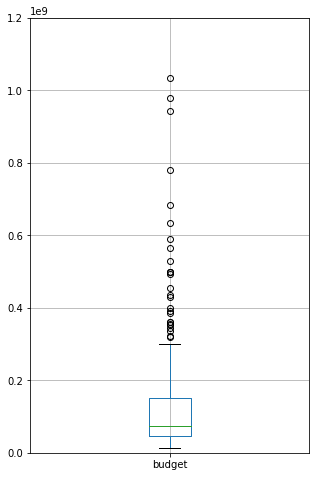

count             315.0
mean      134,096,082.3
std       191,226,039.6
min        14,462,464.0
25%        46,153,866.5
50%        73,379,554.0
75%       150,004,286.5
max     2,305,074,303.0
Name: budget, dtype: float64

In [35]:
# Построим диаграмму размаха budget, чтобы посмотреть выбросы. 
data.boxplot(column=['budget'], figsize=(5, 8))
plt.ylim(0, 1200000000)
plt.show()
data['budget'].describe()

По столбцам budget_0 budget_2 видим, что между ними нет пропорциональной зависимости, поэтому оставим нулевые значения в столбце budget, чтобы данные были более правильными. 

Также с помощью диаграммы размаха видим, что в столбце budget присутствуют выбросы, причем некоторые значения в 2, 3 и более раз больше нормальных значений. Но это не значит, что мы должны избавиться от выбросов, т.к. это очень усреднит данные и уберет наиболее просматриваемые фильмы. 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [36]:
# Добавим столбец с годом.
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Столбец с основным жанром фильма создала на Шаге 2.2

In [37]:
# Удалим пустые значения из столбца director, чтобы применить функцию следующим шагом. Можно удалить пустые значения,
# потому что их не много  и их отсутсвие не должно повлиять на следующие вычисления.
data = data.dropna(subset=['director'])

In [38]:
# Функция, которая отделяет первое слово или группу слов в строке до запятой.
def first_name(value):
    return value.split(',')[0]

In [39]:
data['director_first'] = data['director'].apply(first_name)
pd.set_option('display.max_columns', None)
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,one_genre,budget_0,budget_2,year,director_first
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама","332,556,086.9",боевик,NaN,NaN,2015,кевин костнер
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный","38,854,757.6",драма,NaN,NaN,2016,е.матвеев
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер","347,485,481.9",фантастика,NaN,NaN,2016,тимур бекмамбетов


In [40]:
# Посмотрим, все ли в порядке с типом данных добавленных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7485
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7476 non-null   object        
 1   puNumber               7476 non-null   int64         
 2   show_start_date        7476 non-null   datetime64[ns]
 3   type                   7476 non-null   object        
 4   film_studio            7459 non-null   object        
 5   production_country     7475 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6912 non-null   object        
 8   age_restriction        7476 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 315 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
# Расчет доли государственной поддержки фильма от общего бюджета.
data['part'] = (data['budget_0'] / data['budget'] * 100).round()

In [42]:
data[data['part'] > 0][['title', 'puNumber', 'budget', 'part']]

,title,puNumber,budget,part
1281,пока еще жива,111005313,"79,411,900.0",33.0
1448,бесславные придурки,111003314,"37,142,857.0",70.0
1498,невидимки,111004213,"176,023,490.0",61.0
1524,берцы,111004314,"40,574,140.0",69.0
1792,братья ч,111004414,"40,015,122.0",62.0
...,...,...,...,...
7464,союз спасения,111022019,"980,000,000.0",51.0
7466,иван царевич и серый волк 4,114005019,"190,000,000.0",53.0
7474,вторжение,111022519,"944,000,000.0",53.0
7476,я свободен,111023019,"46,154,000.0",65.0


In [43]:
# Рассчитаем медиану доли государственной поддержки.
data['part'].median()

59.0

Из таблицы видим, что доля государственной поддержки фильма от общего бюджета очень разная, может составлять и 33%, и 70%. Что  подтверждает невозможность заполнить нулевые значения средним. Медиана равна 59%.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [44]:
# Посмотрим, сколько фильмов выходило в прокат каждый год.
data_show = data.pivot_table(index='year', values='title', aggfunc='count')
data_show

,title
year,
2010,980
2011,620
2012,592
2013,629
2014,806
2015,705
2016,818
2017,505
2018,891


В целом, не видна тенденция к увеличению или уменьшению количества снимаемых фильмов каждый год. В какой то год их число больше, в какой то меньше. Наибольшее количесво было в 2010, 2018 и 2019. Наименьшее 2012 и 2017.

In [45]:
# Расситаем долю фильмов с информацией о прокате.
ratio = round(len(data.query('box_office > 0')) / len(data['title']) * 100)
ratio

45

45% составляет доля фильмов с указанной информацией о прокате в кинотеатрах.

In [46]:
# Создадим таблицу ratio, где будет информция о фильмах с указанной информацией о прокате в кинотеатрах.
ratio = data.query('box_office > 0').pivot_table(index='year', values=['box_office', 'title'], 
                                                 aggfunc={'box_office' : len, 'title' : len})
# заменим значения в столбце title таблицы ratio на значения таблицы data_show,
# чтобы были полные данные о фильмах, выходивших в прокат.
ratio['title'] = data_show['title']
# Посчитаем, как доля менялась по годам.
ratio['ratio'] = ratio['box_office'] / ratio['title'] * 100
ratio

,box_office,title,ratio
year,,,
2010,755.0,980,77.0
2011,438.0,620,70.6
2012,397.0,592,67.1
2013,378.0,629,60.1
2014,443.0,806,55.0
2015,190.0,705,27.0
2016,237.0,818,29.0
2017,96.0,505,19.0
2018,189.0,891,21.2


Из таблицы видим, что с годами доля фильмов с указанной информацией о прокате в кинотеатрах с каждым годом уменьшается. Возможно, с каждым годом появляется больше авторских кино, которые не всегда показывают в конотеатрах или не все фильмы показывают в кинотеатрах, т.к. для этого есть другие площадки. Также может видеть, что наиболее представленый период в данных это с 2010 по 2014 год. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,box_office
year,
2010,"73,997,007,591.7"
2011,"45,233,104,014.0"
2012,"37,067,933,172.1"
2014,"36,819,594,343.0"
2013,"23,790,962,053.7"
2016,"21,040,268,181.7"
2019,"15,921,753,680.1"
2018,"13,306,719,762.2"
2015,"12,732,694,183.9"


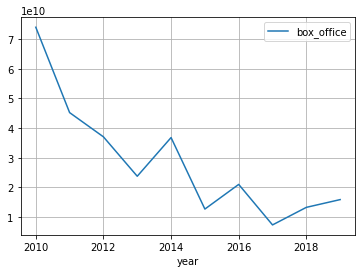

In [47]:
# Создадим сводную таблицу, чтобы посмотреть на сумму сборов по годам.
data_sum = data.query('box_office > 0').pivot_table(index='year', values='box_office', aggfunc='sum')
# Посмтроим график, чтобы посмотреть, как менялась динамика проката по годам.
data_sum.plot(grid=True)
data_sum.sort_values(ascending = False, by='box_office')

Из графика видим, что сборы с 2010 года уменьшаются. Минимальная сумма сбора была в 2017, максимальная в 2010.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [48]:
# Создадим сводную таблицу, в которой рассчитаем среднюю и медианную сумму сборов для каждого года.
data_m = data.query('box_office > 0').pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
data_m.columns=['mean', 'median']
data_m.reset_index()

,year,mean,median
0,2010,"98,009,281.6","39,566,966.3"
1,2011,"103,271,927.0","38,854,757.6"
2,2012,"93,370,108.7","31,341,612.2"
3,2013,"62,939,053.1","24,015,827.9"
4,2014,"83,114,208.4","30,940,259.9"
5,2015,"67,014,179.9","27,285,833.4"
6,2016,"88,777,502.9","25,766,835.6"
7,2017,"76,977,319.3","17,516,918.1"
8,2018,"70,405,924.7","16,870,452.0"
9,2019,"74,054,668.3","17,516,918.1"


Из данных можно сделать вывод, что среднее значение в несколько раз больше медианного. Это говорит о том, что большой разброс данных в сборах за фильм, какие-то собрали намного больше, чем другие. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [49]:
# Создадим сводную таблицу сборов с 2015 по 2019 годы.
data_age = data.query('2015 <= year <= 2019').pivot_table(index=['age_restriction'], values='box_office', aggfunc='sum')
data_age.sort_values(ascending=False,by='box_office')

,box_office
age_restriction,
«18+» - запрещено для детей,"20,445,749,587.6"
«12+» - для детей старше 12 лет,"19,536,121,075.8"
«16+» - для детей старше 16 лет,"19,190,769,286.5"
«6+» - для детей старше 6 лет,"7,807,409,926.2"
«0+» - для любой зрительской аудитории,"3,411,208,580.9"


Наибольшие сборы в период с 2015 по 2019 годы приносят фильмы для аудитории 18+, наименьшие для категории 0+.

In [50]:
# Создадим сводную таблицу сборов с 2015 по 2019 годы и отфильтрум по возрастанию значения каждого года.
data_age = data.query('2015 <= year <= 2019').pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
data_age.sort_values(by=['year','box_office'], ascending=[True,False])

box_office
year age_restriction                                       
2015 «18+» - запрещено для детей            4,565,999,754.3
     «16+» - для детей старше 16 лет        4,466,836,955.4
     «12+» - для детей старше 12 лет        3,103,612,165.2
     «6+» - для детей старше 6 лет            433,951,280.6
     «0+» - для любой зрительской аудитории   162,294,028.5
2016 «16+» - для детей старше 16 лет        7,814,690,069.9
     «18+» - запрещено для детей            6,975,933,890.1
     «12+» - для детей старше 12 лет        3,833,385,362.6
     «6+» - для детей старше 6 лет          1,221,848,275.5
     «0+» - для любой зрительской аудитории 1,194,410,583.5
2017 «12+» - для детей старше 12 лет        2,435,866,015.1
     «18+» - запрещено для детей            2,036,127,637.6
     «16+» - для детей старше 16 лет        1,153,771,387.0
     «6+» - для детей старше 6 лет          1,013,538,421.9
     «0+» - для любой зрительской аудитории   750,519,187.5
2018 «12+» - для детей старше 12 лет        6,298,764,820.4
     «16+» - для детей старше 16 лет        2,558,198,376.1
     «18+» - запрещено для детей            2,410,743,585.2
     «6+» - для детей старше 6 лет          1,349,112,872.6
     «0+» - для любой зрительской аудитории   689,900,107.8
2019 «18+» - запрещено для детей            4,456,944,720.3
     «12+» - для детей старше 12 лет        3,864,492,712.5
     «6+» - для детей старше 6 лет          3,788,959,075.6
     «16+» - для детей старше 16 лет        3,197,272,498.1
     «0+» - для любой зрительской аудитории   614,084,673.6

Наименьший сбор у категории фильмов 0+ в каждый из годов с 2015 по 2019, что связано с тем, что маленьких детей реже водят в кинотеатры, чем ходят более взрослые.Также видим тенденцию к увелечению сборов с годами, возможно, стали снимать больше и для данной категории, а также родители стали чаще водить своих детей в кино.

Как мы видим из таблицы, категория с наибольшим количеством сборов меняется почти кадый год. В 2015 году это категория 18+, в 2016 - 16+, в 2017 и 2018 - 12+, в 2019 - 18+. Это может быть связано с тем, что критерии попадания в ту или иную группу могут меняться с каждым годом или зависеть от страны производства, также может быть связано с тем, что в какой то из годов выходило большое количество наиболее востребованных к просмотру фильмов той категории, которая собрала наибольшее количество сборов.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [51]:
# Создадим таблицу с данными о фильмах, получивших государственную поддержку.
data_gos = data[data['budget'] > 0][['title', 'type', 'ratings', 'budget', 'budget_0', 'part', 'box_office', 'film_studio', 'year', 'age_restriction']]
data_gos

,title,type,ratings,budget,budget_0,part,box_office,film_studio,year,age_restriction
1281,пока еще жива,художественный,8.1,"79,411,900.0","26,500,000.0",33.0,NaN,"ано содействия развитию кинематографии ""ангел-...",2013,«16+» - для детей старше 16 лет
1448,бесславные придурки,художественный,NaN,"37,142,857.0","26,000,000.0",70.0,NaN,"ооо ""компания ""атк-студио""",2014,«12+» - для детей старше 12 лет
1498,невидимки,художественный,5.3,"176,023,490.0","107,847,945.0",61.0,NaN,"ооо ""компания ""реал-дакота""",2013,«12+» - для детей старше 12 лет
1524,берцы,художественный,4.2,"40,574,140.0","28,000,000.0",69.0,NaN,"ооо ""студия ""пассажир""",2014,«16+» - для детей старше 16 лет
1792,братья ч,художественный,6.4,"40,015,122.0","25,000,000.0",62.0,NaN,"ооо ""студия ""пассажир""",2014,«16+» - для детей старше 16 лет
...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,художественный,6.0,"980,000,000.0","500,000,000.0",51.0,NaN,"зао ""дирекция кино""",2019,«12+» - для детей старше 12 лет
7466,иван царевич и серый волк 4,анимационный,6.7,"190,000,000.0","100,000,000.0",53.0,NaN,"ооо ""студия анимационного кино ""мельница""",2019,«6+» - для детей старше 6 лет
7474,вторжение,художественный,5.7,"944,000,000.0","500,000,000.0",53.0,"371,056,927.1","ооо ""арт пикчерс студия"", ооо ""водород 2011""",2019,«12+» - для детей старше 12 лет
7476,я свободен,художественный,5.9,"46,154,000.0","30,000,000.0",65.0,"85,648,826.2","ао ""тпо ""киностудия им. м.горького""",2019,«12+» - для детей старше 12 лет


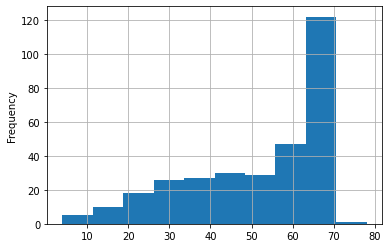

In [52]:
# Построим гистограмму, чтобы посмотреть долю государственной поддержки для кино. 
data_gos['part'].sort_values().plot(kind='hist', grid=True)
plt.show()

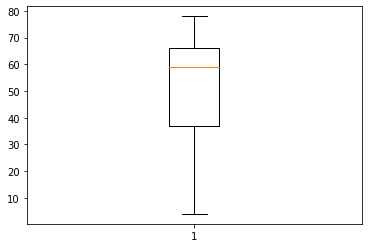

count   315.0
mean     51.7
std      17.0
min       4.0
25%      37.0
50%      59.0
75%      66.0
max      78.0
Name: part, dtype: float64

In [53]:
# Построим диаграмму размаха, чтобы посмотреть на основыне характеристики.
plt.boxplot(data_gos['part'])
plt.show()
data_gos['part'].describe()

По гистограмме и диаграмме размаха можем сделать вывод, что наиболее распространенная доля государсвенной поддержки составляет 60%.

In [54]:
# Добавим столбец payback, чтобы посмотреть, окупился ли фильм. 
data_gos['payback'] = data_gos['box_office'] / data_gos['budget'] 
data_gos.info()
data_gos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7478
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            315 non-null    object 
 1   type             315 non-null    object 
 2   ratings          298 non-null    float64
 3   budget           315 non-null    float64
 4   budget_0         315 non-null    float64
 5   part             315 non-null    float64
 6   box_office       12 non-null     float64
 7   film_studio      315 non-null    object 
 8   year             315 non-null    int64  
 9   age_restriction  315 non-null    object 
 10  payback          12 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 29.5+ KB


,title,type,ratings,budget,budget_0,part,box_office,film_studio,year,age_restriction,payback
1281,пока еще жива,художественный,8.1,"79,411,900.0","26,500,000.0",33.0,NaN,"ано содействия развитию кинематографии ""ангел-...",2013,«16+» - для детей старше 16 лет,NaN
1448,бесславные придурки,художественный,NaN,"37,142,857.0","26,000,000.0",70.0,NaN,"ооо ""компания ""атк-студио""",2014,«12+» - для детей старше 12 лет,NaN
1498,невидимки,художественный,5.3,"176,023,490.0","107,847,945.0",61.0,NaN,"ооо ""компания ""реал-дакота""",2013,«12+» - для детей старше 12 лет,NaN
1524,берцы,художественный,4.2,"40,574,140.0","28,000,000.0",69.0,NaN,"ооо ""студия ""пассажир""",2014,«16+» - для детей старше 16 лет,NaN
1792,братья ч,художественный,6.4,"40,015,122.0","25,000,000.0",62.0,NaN,"ооо ""студия ""пассажир""",2014,«16+» - для детей старше 16 лет,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,художественный,6.0,"980,000,000.0","500,000,000.0",51.0,NaN,"зао ""дирекция кино""",2019,«12+» - для детей старше 12 лет,NaN
7466,иван царевич и серый волк 4,анимационный,6.7,"190,000,000.0","100,000,000.0",53.0,NaN,"ооо ""студия анимационного кино ""мельница""",2019,«6+» - для детей старше 6 лет,NaN
7474,вторжение,художественный,5.7,"944,000,000.0","500,000,000.0",53.0,"371,056,927.1","ооо ""арт пикчерс студия"", ооо ""водород 2011""",2019,«12+» - для детей старше 12 лет,0.4
7476,я свободен,художественный,5.9,"46,154,000.0","30,000,000.0",65.0,"85,648,826.2","ао ""тпо ""киностудия им. м.горького""",2019,«12+» - для детей старше 12 лет,1.9


In [55]:
# Посмотрим, сколько фильмов окупилось. Если значение будет больше или равно 1, то фильм покрыл вложения,
# а чем больше число от 1, тем больше его окупаемость. Меньше 1 - не окупил.
payback_yes = len(data_gos.query('payback >= 1'))
payback_yes

3

In [56]:
# Посмотрим, сколько фильмов не окупилось.
payback_no = len(data_gos.query('payback <= 1'))
payback_no

9

In [57]:
# Доля окупившихся фильмов.
round(payback_yes/payback_no * 100, 1)

33.3

Так как сборы есть всего у 12 фильмов, то сделанные выводы могут быть не совсем корректными для всех фильмов, но других данных для анализа у нас нет. По имеющимся данным, только 33,3% фильмов окупились. Хотя окупаемость невысокая, государство финансирует подобные фильмы, возможно, чтобы рассказать истроию своей страны, или донести определенную мысль до зрителя.

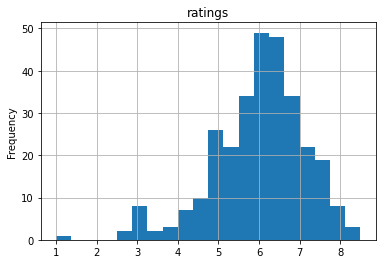

In [58]:
# Пострим гистрограмму, чтобы посмотреть на распределение рейтинга.
data_gos['ratings'].plot(kind='hist', title='ratings', grid=True, bins=20)
plt.show()

In [59]:
# Посмотрим на данные в столбце ratings с помощью метода describe
data_gos['ratings'].describe()

count   298.0
mean      6.0
std       1.1
min       1.0
25%       5.4
50%       6.2
75%       6.7
max       8.5
Name: ratings, dtype: float64

По гистограмме и с помошью метода describe видим, что ниболее частый рейтинг для фильмов с государсвенной поддержкой 6-6,2%. А в среднем составляем от 5,4 до 6,7.

In [60]:
# С помошью pivot_table посмотрим на количество каждого типа фильма. 
data_gos.pivot_table(index='type', values='budget_0', aggfunc=['mean','count'])

,mean,count
,budget_0,budget_0
type,,
анимационный,"76,060,800.0",25
документальный,"3,000,000.0",1
художественный,"58,492,037.5",289


Наибольшей государственной поддерждой пользуются хужожественные фильмы.

In [61]:
# Посморим, какие студии чаще снимают фильмы с государтсвенной поддержкой.
data_gos['film_studio'].value_counts().head()

ооо "студия анимационного кино "мельница"    7
ооо "таббак"                                 6
ооо "кинокомпания "ств"                      6
ооо "каро продакшн"                          4
ооо "киностудия "вертикаль"                  4
Name: film_studio, dtype: int64

Студия, которая чаще снимала фильмы с государсенной поддержкой  - ооо "студия анимационного кино "мельница", но чаще это разные студии.

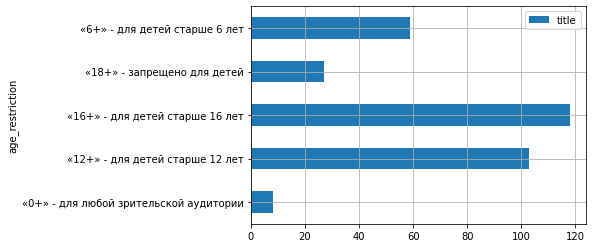

In [62]:
# Посмотрим, как распределяются фильмы с государсвенной поддержкой по возрастным категориям.
data_gos.pivot_table(index='age_restriction', values='title', aggfunc='count').plot.barh(grid=True,stacked=True)
plt.show()

Наибольшую государсвенную поддержку получают фильмы для категорий 16+ и 12+. Вероятно, финансируются фильмы, где меньше явных сцен насилия, жестокости, нецензурной речи.

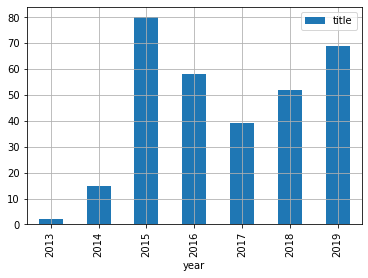

In [63]:
# Построим график, чтобы посмотреть, в какие годы фильмы больше получали государсвенную поддержку.
data_gos.pivot_table(index='year', values='title', aggfunc='count').plot(kind='bar', grid=True)
plt.show()

Наибольшее финансирование было в 2015 и 2019 годах. Возможно, в эти годы было больше средств для финансирования, экономика была стабильнее, или была необходимость донести определенные идеи до граждан. 

### Шаг 5. Напишите общий вывод

Была произведена предобработка данных, заменены пустые значения там, где это необходимо. Сделана замена типов данных. Добавлены необходимые столбцы. 

Было рассмотрено, сколько фильмов выходило в прокат каждый год. Была изучена динамика проката по годам, где было выяснено, что с 2010 сборы падают. Что может быть связано с появлением сторонних форм просмотра фильмов - КиноПоиск, Нетфликс и др. Также было выяснено, что с годами доля фильмов с указанной информацией о прокате в кинотеатрах с каждым годом уменьшается. Была рассчитана средняя и медианная сумму сборов для каждого года, где стало ясно, что среднее значение значительно выше, что говорит о том, что есть фильмы, которые посмотрели намного больше людей, а значит и сборы были больше. Было рассмотрено, как возрастные ограничения связаны со сборами и менялась ли картина с годами. Наибольшое сборы были у фильмов категории 18+.

Также исследовали фильмы, которые получили государственную поддержку. Была посчитана доля государственной поддержки, медиана составила 61,5%. Посмотрели на окупаемость таких фильмов, оказалось, что только 33,3% фильмов с государственной поддержкой окупаются. Можно сделать предположение, что это может быть связано с тем, что фильмы снимают не на интересующие, актуальные темы, не особо хорошего качества, или люди не особо доверяют государтсву, и не хотят потреблять подобный контент. Также посмотрели на рейтинг для фильмов с поддержкой, наибольший составил 5,4 до 6,7 для категории 16+ и 12+ в 2015 и 2019 годах. 